Appling Robust ML model on Healthcare datasets
Issue number 245 Gssoc


---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
shap.initjs()

In [2]:
# loading the dataset in the df variable
df=pd.read_csv(r"/content/Heart_disease_cleveland_new.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
5,56,1,1,120,236,0,0,178,0,0.8,0,0,1,0
6,62,0,3,140,268,0,2,160,0,3.6,2,2,1,1
7,57,0,3,120,354,0,0,163,1,0.6,0,0,1,0
8,63,1,3,130,254,0,2,147,0,1.4,1,1,3,1
9,53,1,3,140,203,1,2,155,1,3.1,2,0,3,1


In [3]:
# check shape and the size
df.shape,df.size

((303, 14), 4242)

In [4]:
# FINDING DUPLICATES
df.duplicated().sum()

np.int64(0)

In [5]:
 # NOW FIRST PRINT THE CORRELATION BETWEEN THE FEATURES AND THE TARGET
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.122300,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.367911,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.259835,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.126879,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.030438,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.054164,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.019115,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.257980,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.321680,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.333925,0.424510


<Axes: >

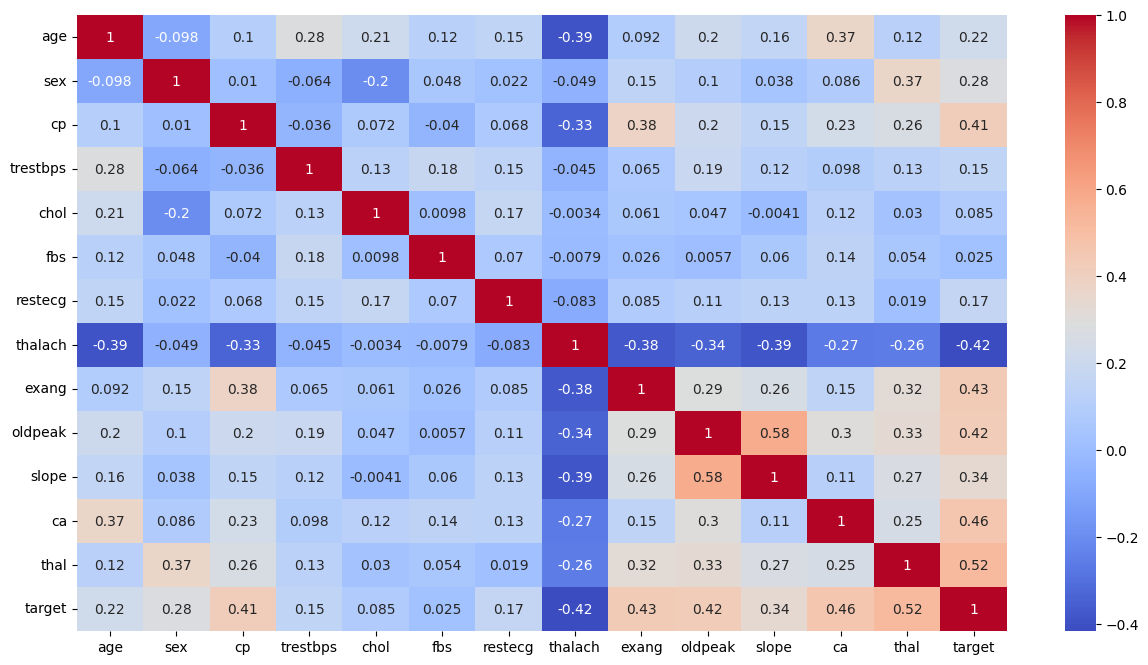

In [6]:
# generating Heatmap of Correlation
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [7]:
# NOW SELECT THE FEATURE ON THE BASIS OF THE CORRELATION MATRIX VALUES
correlation_matrix = df[:-1].corr()
# Define a function to select features based on correlation threshold
def select_features(corr_matrix, threshold):
    # Get the features that are correlated with at least one other feature above the threshold
    selected_features = set()
    for column in corr_matrix.columns:
        # Get the absolute correlation values
        correlated_features = corr_matrix.index[abs(corr_matrix[column]) > threshold].tolist()

        # Exclude the feature itself from the list if it exists
        if column in correlated_features:
            correlated_features.remove(column)

        # Only add the column if it has correlated features
        if correlated_features:  # Only add if there are correlated features
            selected_features.add(column)
            selected_features.update(correlated_features)

    return list(selected_features)

# Create different datasets based on varying thresholds

thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]  # Defining correlation thresholds
datasets = {}

for threshold in thresholds:
    features = select_features(correlation_matrix, threshold)
    datasets[threshold] = df[features]

#  Print the datasets
for threshold, dataset in datasets.items():
    print(f'\nDataset with correlation threshold {threshold}:')
    print(dataset)
    print(f'Shape: {dataset.shape}')  # Print the shape of each dataset




Dataset with correlation threshold 0.1:
     exang  cp  thal  age  sex  chol  thalach  target  restecg  oldpeak  ca  \
0        0   0     2   63    1   233      150       0        2      2.3   0   
1        1   3     1   67    1   286      108       1        2      1.5   3   
2        1   3     3   67    1   229      129       1        2      2.6   2   
3        0   2     1   37    1   250      187       0        0      3.5   0   
4        0   1     1   41    0   204      172       0        2      1.4   0   
..     ...  ..   ...  ...  ...   ...      ...     ...      ...      ...  ..   
298      0   0     3   45    1   264      132       1        0      1.2   0   
299      0   3     3   68    1   193      141       1        0      3.4   2   
300      1   3     3   57    1   131      115       1        0      1.2   1   
301      0   1     1   57    0   236      174       1        2      0.0   1   
302      0   2     1   38    1   175      173       0        0      0.0   0   

     fbs  

In [ ]:
# BY THE ABOVE CODE, WE CAN CLEARLY SEE , THERE ARE NO CORRELATION BASED ON THE 0.7 AND 0.9, AND 0.5 HAVE ONLY 4 FEATURE WHICH IS NOT SUITALBLE ENOUGH, SO WE ARE PROCEEDING WITH THE 0.3 THRESHOLD

In [8]:
# this is feature selected with the thresould 0.3
datasets[0.3]

,exang,cp,thal,age,sex,target,oldpeak,ca,thalach,slope
0,0,0,2,63,1,0,2.3,0,150,2
1,1,3,1,67,1,1,1.5,3,108,1
2,1,3,3,67,1,1,2.6,2,129,1
3,0,2,1,37,1,0,3.5,0,187,2
4,0,1,1,41,0,0,1.4,0,172,0
...,...,...,...,...,...,...,...,...,...,...
298,0,0,3,45,1,1,1.2,0,132,1
299,0,3,3,68,1,1,3.4,2,141,1
300,1,3,3,57,1,1,1.2,1,115,1
301,0,1,1,57,0,1,0.0,1,174,1


In [9]:
from re import X
# now normal this value between 0 to 1 , using min max scaler for this
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=datasets[0.3].drop('target',axis=1)
y=df['target']


In [10]:
# now scale each column of the dataset
scaled_data=scaler.fit_transform(x)
scaled_data


array([[0.        , 0.        , 0.5       , ..., 0.        , 0.60305344,
        1.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 0.28244275,
        0.5       ],
       [1.        , 1.        , 1.        , ..., 0.66666667, 0.44274809,
        0.5       ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.33333333, 0.33587786,
        0.5       ],
       [0.        , 0.33333333, 0.        , ..., 0.33333333, 0.78625954,
        0.5       ],
       [0.        , 0.66666667, 0.        , ..., 0.        , 0.77862595,
        0.        ]])

Now we have dataset which is in numerical form, so we can train machine learning models on it, for it first i am traing ml model on un balanced original dataset

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tabulate import tabulate   # for pretty tables

# Split data
x_train, x_test, y_train, y_test = train_test_split(
    scaled_data, y, test_size=0.2, random_state=42
)

# Models
models = {
    "Support Vector Classifier (SVC)": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

results = []

# Train & evaluate
for name, model in models.items():
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    results.append([name, f"{score:.4f}"])

# Beautify output
print("\nModel Performance (without balancing):\n")
print(tabulate(results, headers=["Model", "Accuracy"], tablefmt="fancy_grid"))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:58:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model Performance (without balancing):

╒═════════════════════════════════╤════════════╕
│ Model                           │   Accuracy │
╞═════════════════════════════════╪════════════╡
│ Support Vector Classifier (SVC) │     0.8689 │
├─────────────────────────────────┼────────────┤
│ Random Forest                   │     0.8525 │
├─────────────────────────────────┼────────────┤
│ XGBoost                         │     0.8033 │
╘═════════════════════════════════╧════════════╛


In [12]:
# here clearly see, only SVC perform best on unbalanced data.
# now using uning SMOTE to create synthetic data

In [13]:
# now using smote to create synthetic data
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(sampling_strategy={1: 2000,0:2000},random_state=42)
# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(x, y)
# Create a new balanced DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=x.columns)
balanced_df['target'] = y_resampled
# Now you have a balanced dataset in balanced_df
print(balanced_df.target.value_counts())
# Example of creating synthetic dates
print(balanced_df.head())

target
0    2000
1    2000
Name: count, dtype: int64
   exang  cp  thal  age  sex  oldpeak  ca  thalach  slope  target
0      0   0     2   63    1      2.3   0      150      2       0
1      1   3     1   67    1      1.5   3      108      1       1
2      1   3     3   67    1      2.6   2      129      1       1
3      0   2     1   37    1      3.5   0      187      2       0
4      0   1     1   41    0      1.4   0      172      0       0


In [14]:
# additionally check the is any dublocate in the dataset
balanced_df.duplicated().sum()

np.int64(303)

In [15]:
# remove the all dunplicate value
balanced_df.drop_duplicates(inplace=True)
print("THE TOTAL NUMBER OF THE DUPLICATE VALUES",balanced_df.duplicated().sum())
print("THE REMAINING NUMBER OF THE VALUES AFTER REMOVAL OF THE DUPLICATE DATA ",balanced_df.shape)
print("THE REMAINING NUMBER OF THE VALUES AFTER REMOVAL OF THE DUPLICATE DATA ",balanced_df.size)
print("THE NUMBER OF THE 0 IN THE DATASET : ",balanced_df.target.value_counts()[0])
print("THE NUMBER OF THE 1 IN THE DATASET : ",balanced_df.target.value_counts()[1])


THE TOTAL NUMBER OF THE DUPLICATE VALUES 0
THE REMAINING NUMBER OF THE VALUES AFTER REMOVAL OF THE DUPLICATE DATA  (3697, 10)
THE REMAINING NUMBER OF THE VALUES AFTER REMOVAL OF THE DUPLICATE DATA  36970
THE NUMBER OF THE 0 IN THE DATASET :  1753
THE NUMBER OF THE 1 IN THE DATASET :  1944


In [16]:
# here we can also see there are little bit of imbalance in the dataset, for first overcome this.
print(balanced_df["target"].value_counts()[0])
print(balanced_df["target"].value_counts()[1])

1753
1944


In [17]:
# Now using Under sampling to balance the dataset
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
X = balanced_df.drop('target', axis=1)  # Features
y = balanced_df['target']  # Target

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Fit and resample
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Create a new balanced DataFrame
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['target'] = y_resampled

# Check the new class distribution
print(balanced_df["target"].value_counts())

target
0    1753
1    1753
Name: count, dtype: int64


In [18]:
balanced_df.duplicated().sum()

np.int64(0)

In [19]:
# here successfully balanced the dataset and there is no duplicate value, so dataset is ready for the evaluation

In [20]:
x=balanced_df.drop('target',axis=1) #feature
y=balanced_df['target'] #target


In [21]:
# now scale each column of the dataset
scaled_data=scaler.fit_transform(x)

In [22]:
# here check the value of target
y.value_counts()


,count
target,
0,1753
1,1753


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:33:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model Performance (after balancing):

╒═════════════════════════════════╤══════════════════╤═════════════════╕
│ Model                           │   Train Accuracy │   Test Accuracy │
╞═════════════════════════════════╪══════════════════╪═════════════════╡
│ Support Vector Classifier (SVC) │           0.9058 │          0.906  │
├─────────────────────────────────┼──────────────────┼─────────────────┤
│ Random Forest                   │           1      │          0.9744 │
├─────────────────────────────────┼──────────────────┼─────────────────┤
│ XGBoost                         │           0.9996 │          0.9729 │
╘═════════════════════════════════╧══════════════════╧═════════════════╛

✅ Best Model based on Test Accuracy: Random Forest

Cross-Validation Scores: [0.93162393 0.9743224  0.97574893 0.9743224  0.98145506]
Mean CV Accuracy: 0.9674945438140874


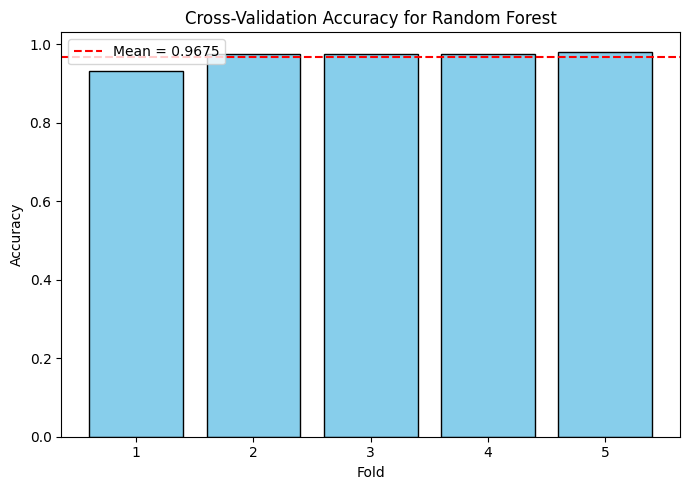

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt

# Split data
x_train, x_test, y_train, y_test = train_test_split(
    scaled_data, y, test_size=0.2, random_state=42
)

# Models
models = {
    "Support Vector Classifier (SVC)": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

results = []

# Train & evaluate
for name, model in models.items():
    model.fit(x_train, y_train)
    test_score = model.score(x_test, y_test)
    train_score = model.score(x_train, y_train)
    results.append([name, f"{train_score:.4f}", f"{test_score:.4f}"])

# Beautify output
print("\nModel Performance (after balancing):\n")
print(tabulate(results, headers=["Model", "Train Accuracy", "Test Accuracy"], tablefmt="fancy_grid"))

# ---- Select Best Model ----
# Convert results into list of test accuracies
test_accuracies = [float(r[2]) for r in results]
best_index = int(np.argmax(test_accuracies))   # index of best model
best_model_name = results[best_index][0]
best_model = list(models.values())[best_index]

print(f"\n✅ Best Model based on Test Accuracy: {best_model_name}")

# ---- Perform Cross-Validation on Best Model ----
scores = cross_val_score(best_model, scaled_data, y, cv=5)  # 5-fold CV
print("\nCross-Validation Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

# ---- Plot Cross-Validation Results ----
plt.figure(figsize=(7, 5))
plt.bar(range(1, 6), scores, color="skyblue", edgecolor="black")
plt.axhline(y=scores.mean(), color="red", linestyle="--", label=f"Mean = {scores.mean():.4f}")
plt.xticks(range(1, 6))
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title(f"Cross-Validation Accuracy for {best_model_name}")
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
# classificattion report for the random forest model
from sklearn.metrics import classification_report

# After fitting your model
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       373
           1       0.98      0.97      0.97       329

    accuracy                           0.97       702
   macro avg       0.97      0.97      0.97       702
weighted avg       0.97      0.97      0.97       702



In [26]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9725588141822241


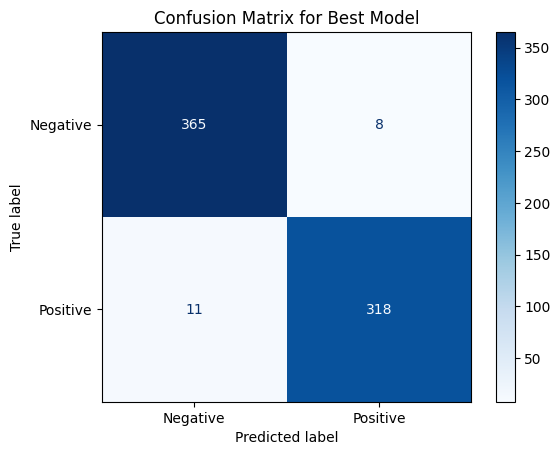

Confusion Matrix:
[[365   8]
 [ 11 318]]


In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict using the best model
y_pred_best = best_model.predict(x_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Best Model")
plt.show()

# Print the confusion matrix values
print("Confusion Matrix:")
print(cm)


In [30]:
from sklearn.metrics import roc_curve, auc

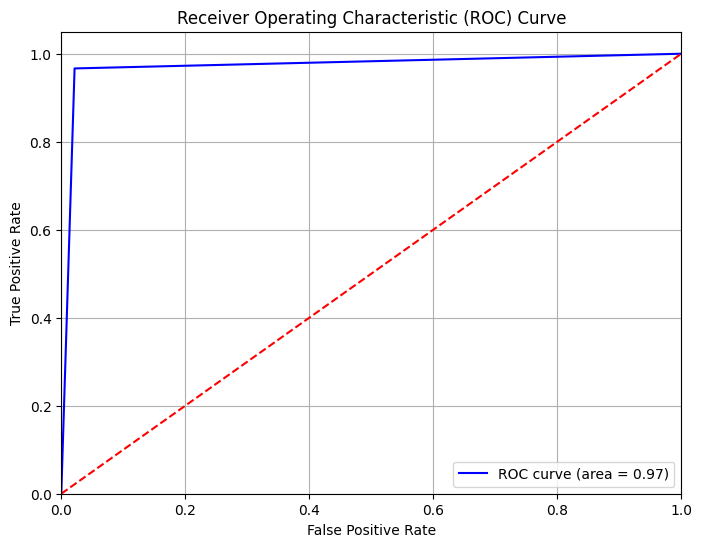

In [31]:
y_scores = best_model.predict_proba(x_test)[:, 1]  # Probability estimates for the positive class

# Step 5: Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_best)

# Step 6: Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Step 7: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()